In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("processed.csv")
pd.set_option("display.max_columns", None)
df

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,8.3,44.0,71.0,22.0,1007.7,1007.1,8.0,0.0,0,0
1,0.0,10.0,44.0,44.0,25.0,1010.6,1007.8,7.0,1.0,0,0
2,0.0,4.4,46.0,38.0,30.0,1007.6,1008.7,8.0,2.0,0,0
3,0.0,8.9,24.0,45.0,16.0,1017.6,1012.8,0.0,5.0,0,0
4,1.0,3.0,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,7.8,31.0,51.0,24.0,1024.6,1020.3,1.0,1.0,0,0
145456,0.0,13.5,22.0,56.0,21.0,1023.5,1019.1,8.0,5.0,0,0
145457,0.0,11.0,37.0,53.0,24.0,1021.0,1016.8,8.0,1.0,0,0
145458,0.0,13.2,28.0,51.0,24.0,1019.4,1016.5,3.0,2.0,0,0


In [3]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print("SVM Accuracy:", accuracy_svm)
print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM Classification Report:")
print(class_report_svm)

SVM Accuracy: 0.8381685686786745

SVM Confusion Matrix:
[[21533  1139]
 [ 3569  2851]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.44      0.55      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [5]:
svm_classifier = SVC(kernel='linear', C=1.0)
cross_val_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate and print the mean accuracy
mean_accuracy_svm = cross_val_scores.mean()
print("Mean Accuracy:", mean_accuracy_svm)

Cross-Validation Scores: [0.83318438 0.82393785 0.84621202 0.84349649 0.84414959]
Mean Accuracy: 0.8381960676474632


ROC-AUC Score: 0.8522654922316243


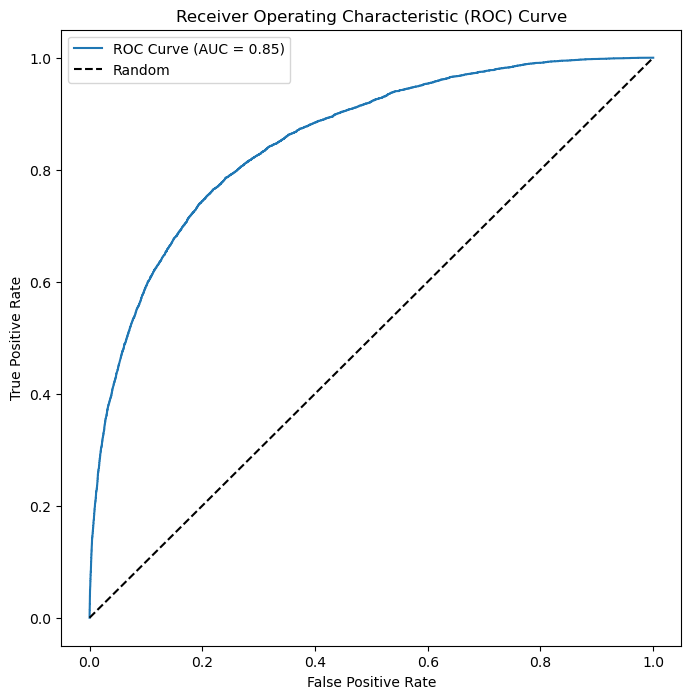

In [6]:
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)
y_scores_positive = svm_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_scores_positive)

# Print the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve (optional)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_positive)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [8]:
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_classifier, model_file)